<a href="https://colab.research.google.com/github/dimi-fn/Emotion-Recognition-in-Movie-Abstracts/blob/master/4c_Models_DLoverviews%26metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries for data analysis and manipulation
import pandas as pd
import numpy as np

np.random.seed(42) # to make this notebook's output stable across runs

# For plotting figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Generating the version of a wide variety of packages/libraries used & working environment
#pd.__version__
#pd.show_versions(as_json=False)


In [2]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# `movies_final_3`

In [4]:
downloaded = drive.CreateFile({'id':'15H_8jf2Yr7uGM1namIgxzn-LMnTnF4DE'}) 
downloaded.GetContentFile('movies_final_3.csv') 

movies_final_3 = pd.read_csv('movies_final_3.csv') 
movies_final_3.shape

(55877, 17)

## Data Exploration and Statistical Analysis

In [5]:
movies_final_3.head()

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative,5,War|Crime,PERSON|PERSON|ORG|PERSON|DATE|PERSON|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645,negative,6,Family|Relatives,PERSON|PERSON|NORP|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860,positive,1,Affairs|Mystery,PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON,1.0,0.0,0.0,0.0,0.0,1.0


In [6]:
movies_final_3.isnull().sum()

# missing values are all dataset -minus 300 labelled

movieId                      0
tmdbId                       0
title                        0
genres                       0
overview                     0
Vader_score                  0
Vader_compound               0
Vader_polarity               0
NMF_topic                    0
NMF_topic_description        0
entities                     0
happiness                55577
sadness                  55577
anger                    55577
disgust                  55577
fear                     55577
surprise                 55577
dtype: int64

In [7]:
movies_final_3.head(1)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.25,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print ("Number of unique movies: {}".format(movies_final_3.movieId.nunique()))

print ("Number of unique genres: {}".format(movies_final_3.genres.nunique()))

Number of unique movies: 55877
Number of unique genres: 1621


In [9]:
movies_final_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55877 entries, 0 to 55876
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                55877 non-null  int64  
 1   tmdbId                 55877 non-null  float64
 2   title                  55877 non-null  object 
 3   genres                 55877 non-null  object 
 4   overview               55877 non-null  object 
 5   Vader_score            55877 non-null  object 
 6   Vader_compound         55877 non-null  float64
 7   Vader_polarity         55877 non-null  object 
 8   NMF_topic              55877 non-null  int64  
 9   NMF_topic_description  55877 non-null  object 
 10  entities               55877 non-null  object 
 11  happiness              300 non-null    float64
 12  sadness                300 non-null    float64
 13  anger                  300 non-null    float64
 14  disgust                300 non-null    float64
 15  fe

# Splitting the data between labelled and unlabelled regarding emotion

In [10]:
# labelled dataframe
# 300 emotions to 300 movie overviews
# it should include 300 rows

data=[]
for row in movies_final_3.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) or (row.sadness ==0 or row.sadness==1) or (row.anger==0 or row.anger==1) or (row.disgust==0 or row.disgust==1) or (row.fear==0 or row.fear==1) or (row.surprise==0 and row.surprise==1):
    data.append([row.movieId, row.tmdbId, row.title, row.genres, row.overview, row.Vader_score, row.Vader_compound, row.Vader_polarity, row.NMF_topic,
                 row.NMF_topic_description, row.entities, row.happiness, row.sadness, row.anger, row.disgust, row.fear, row.surprise])

labelled_df = pd.DataFrame(data, columns=['movieId', 'tmdbId', "title", 'genres', "overview", "Vader_score", "Vader_compound",
                                          "Vader_polarity", "NMF_topic", "NMF_topic_description", "entities", 
                                          "happiness", "sadness", "anger", "disgust", "fear", "surprise"
                                          ])
labelled_df.shape

(300, 17)

In [11]:
labelled_df.isnull().sum().any()

False

In [12]:
# unlabelled dataframe
# it should include initial number of rows - 300 = 55877 - 300 = 55,577 rows

data=[]
for row in movies_final_3.itertuples(index=True, name='Pandas'):
  if not((row.happiness ==0 or row.happiness==1) or (row.sadness ==0 or row.sadness==1) or (row.anger==0 or row.anger==1) or (row.disgust==0 or row.disgust==1) or (row.fear==0 or row.fear==1) or (row.surprise==0 and row.surprise==1)):
    data.append([row.movieId, row.tmdbId, row.title, row.genres, row.overview, row.Vader_score, row.Vader_compound, row.Vader_polarity, row.NMF_topic,
                 row.NMF_topic_description, row.entities, row.happiness, row.sadness, row.anger, row.disgust, row.fear, row.surprise])
    

unlabelled_df = pd.DataFrame(data, columns=['movieId', 'tmdbId', "title", 'genres', "overview", "Vader_score", "Vader_compound",
                                          "Vader_polarity", "NMF_topic", "NMF_topic_description", "entities", 
                                          "happiness", "sadness", "anger", "disgust", "fear", "surprise"
                                          ])
unlabelled_df.shape



(55577, 17)

In [13]:
unlabelled_df.isnull().sum()

movieId                      0
tmdbId                       0
title                        0
genres                       0
overview                     0
Vader_score                  0
Vader_compound               0
Vader_polarity               0
NMF_topic                    0
NMF_topic_description        0
entities                     0
happiness                55577
sadness                  55577
anger                    55577
disgust                  55577
fear                     55577
surprise                 55577
dtype: int64

## `labelled_df`

Data Exploration and Statistical Analysis

In [14]:
labelled_df.shape

(300, 17)

In [15]:
labelled_df.head(1)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON,1.0,0.0,0.0,0.0,0.0,1.0


> We know in advance the the unique number of genres is 12, since the emotion labelling took place on 12 genres (from the top genre list of the dataset).

In [16]:
print ("Number of unique movies: {}".format(labelled_df.movieId.nunique()))

print ("Number of unique genres: {}".format(labelled_df.genres.nunique()))

Number of unique movies: 300
Number of unique genres: 12


In [17]:
labelled_df.describe()

,movieId,tmdbId,Vader_compound,NMF_topic,happiness,sadness,anger,disgust,fear,surprise
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,13309.990000,57695.770000,-0.031751,2.363333,0.226667,0.263333,0.350000,0.306667,0.700000,0.566667
std,33602.332169,90186.881273,0.643688,2.172646,0.419375,0.441178,0.477767,0.461880,0.459023,0.496364
min,5.000000,5.000000,-0.981400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,370.500000,12105.750000,-0.690800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1716.500000,27473.500000,0.051600,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,4078.750000,47580.000000,0.542300,4.250000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,145470.000000,581579.000000,0.984800,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                300 non-null    int64  
 1   tmdbId                 300 non-null    float64
 2   title                  300 non-null    object 
 3   genres                 300 non-null    object 
 4   overview               300 non-null    object 
 5   Vader_score            300 non-null    object 
 6   Vader_compound         300 non-null    float64
 7   Vader_polarity         300 non-null    object 
 8   NMF_topic              300 non-null    int64  
 9   NMF_topic_description  300 non-null    object 
 10  entities               300 non-null    object 
 11  happiness              300 non-null    float64
 12  sadness                300 non-null    float64
 13  anger                  300 non-null    float64
 14  disgust                300 non-null    float64
 15  fear  

In [19]:
labelled_df.isnull().sum().any()

False

In [20]:
labelled_df.happiness = labelled_df.happiness.astype(int)

labelled_df.sadness = labelled_df.sadness.astype(int)

labelled_df.anger = labelled_df.anger.astype(int)

labelled_df.disgust = labelled_df.disgust.astype(int)

labelled_df.fear = labelled_df.fear.astype(int)

labelled_df.surprise = labelled_df.surprise.astype(int)

In [21]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                300 non-null    int64  
 1   tmdbId                 300 non-null    float64
 2   title                  300 non-null    object 
 3   genres                 300 non-null    object 
 4   overview               300 non-null    object 
 5   Vader_score            300 non-null    object 
 6   Vader_compound         300 non-null    float64
 7   Vader_polarity         300 non-null    object 
 8   NMF_topic              300 non-null    int64  
 9   NMF_topic_description  300 non-null    object 
 10  entities               300 non-null    object 
 11  happiness              300 non-null    int64  
 12  sadness                300 non-null    int64  
 13  anger                  300 non-null    int64  
 14  disgust                300 non-null    int64  
 15  fear  

In [22]:
# a sample of movie overviews before data preprocessing
labelled_df.overview[:6]

0    Just when George Banks has recovered from his ...
1    When a man's daughter is suddenly taken during...
2    An epic look at President Richard M. Nixon—a m...
3    It's Ted the Bellhop's first night on the job....
4    Summoned from an ashram in Tibet, Ace finds hi...
5    The evil Iago pretends to be friend of Othello...
Name: overview, dtype: object

### Visualisation

The distribution of the number of words in comment texts.


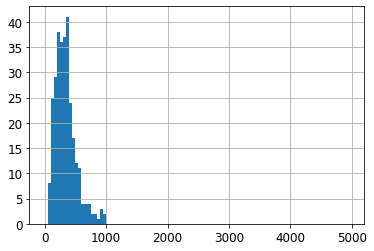

In [23]:
lens = labelled_df.overview.str.len()
lens.hist(bins = np.arange(0,5000,50))

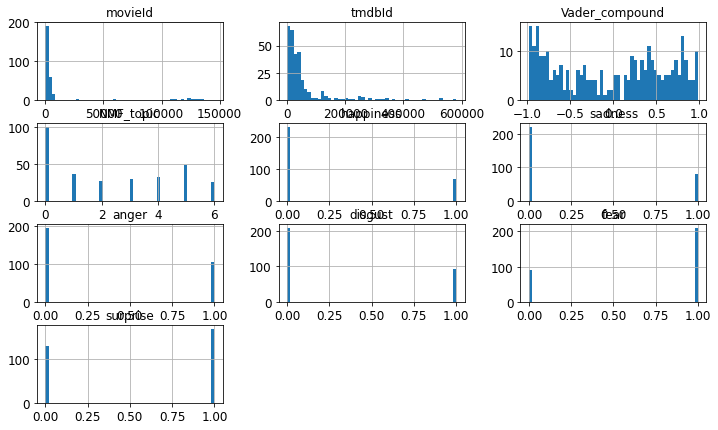

In [24]:
# Plot histograms 
%matplotlib inline
import matplotlib.pyplot as plt

labelled_df.hist(bins=50, figsize=(12,7))
plt.show()

>Heatmap of the dataset:

>>The darker the colour(closest to 1), the stronger is the correlation. 


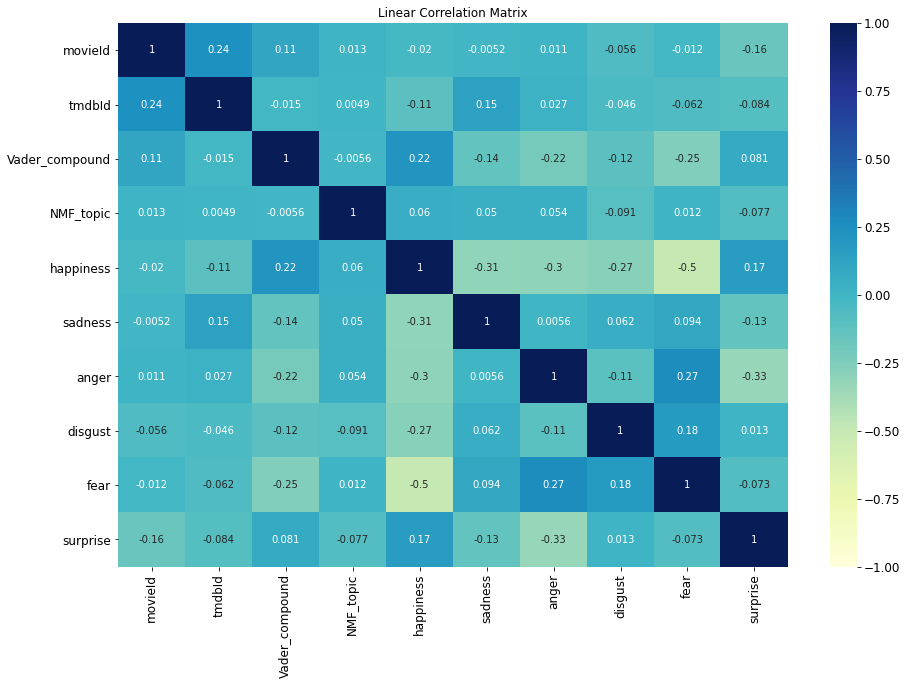

In [25]:
# Plot linear correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(labelled_df.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('Linear Correlation Matrix')
plt.show()

#### Wordclouds before Data Preprocessing - labelled_df



#####  Emotions - labelled_df

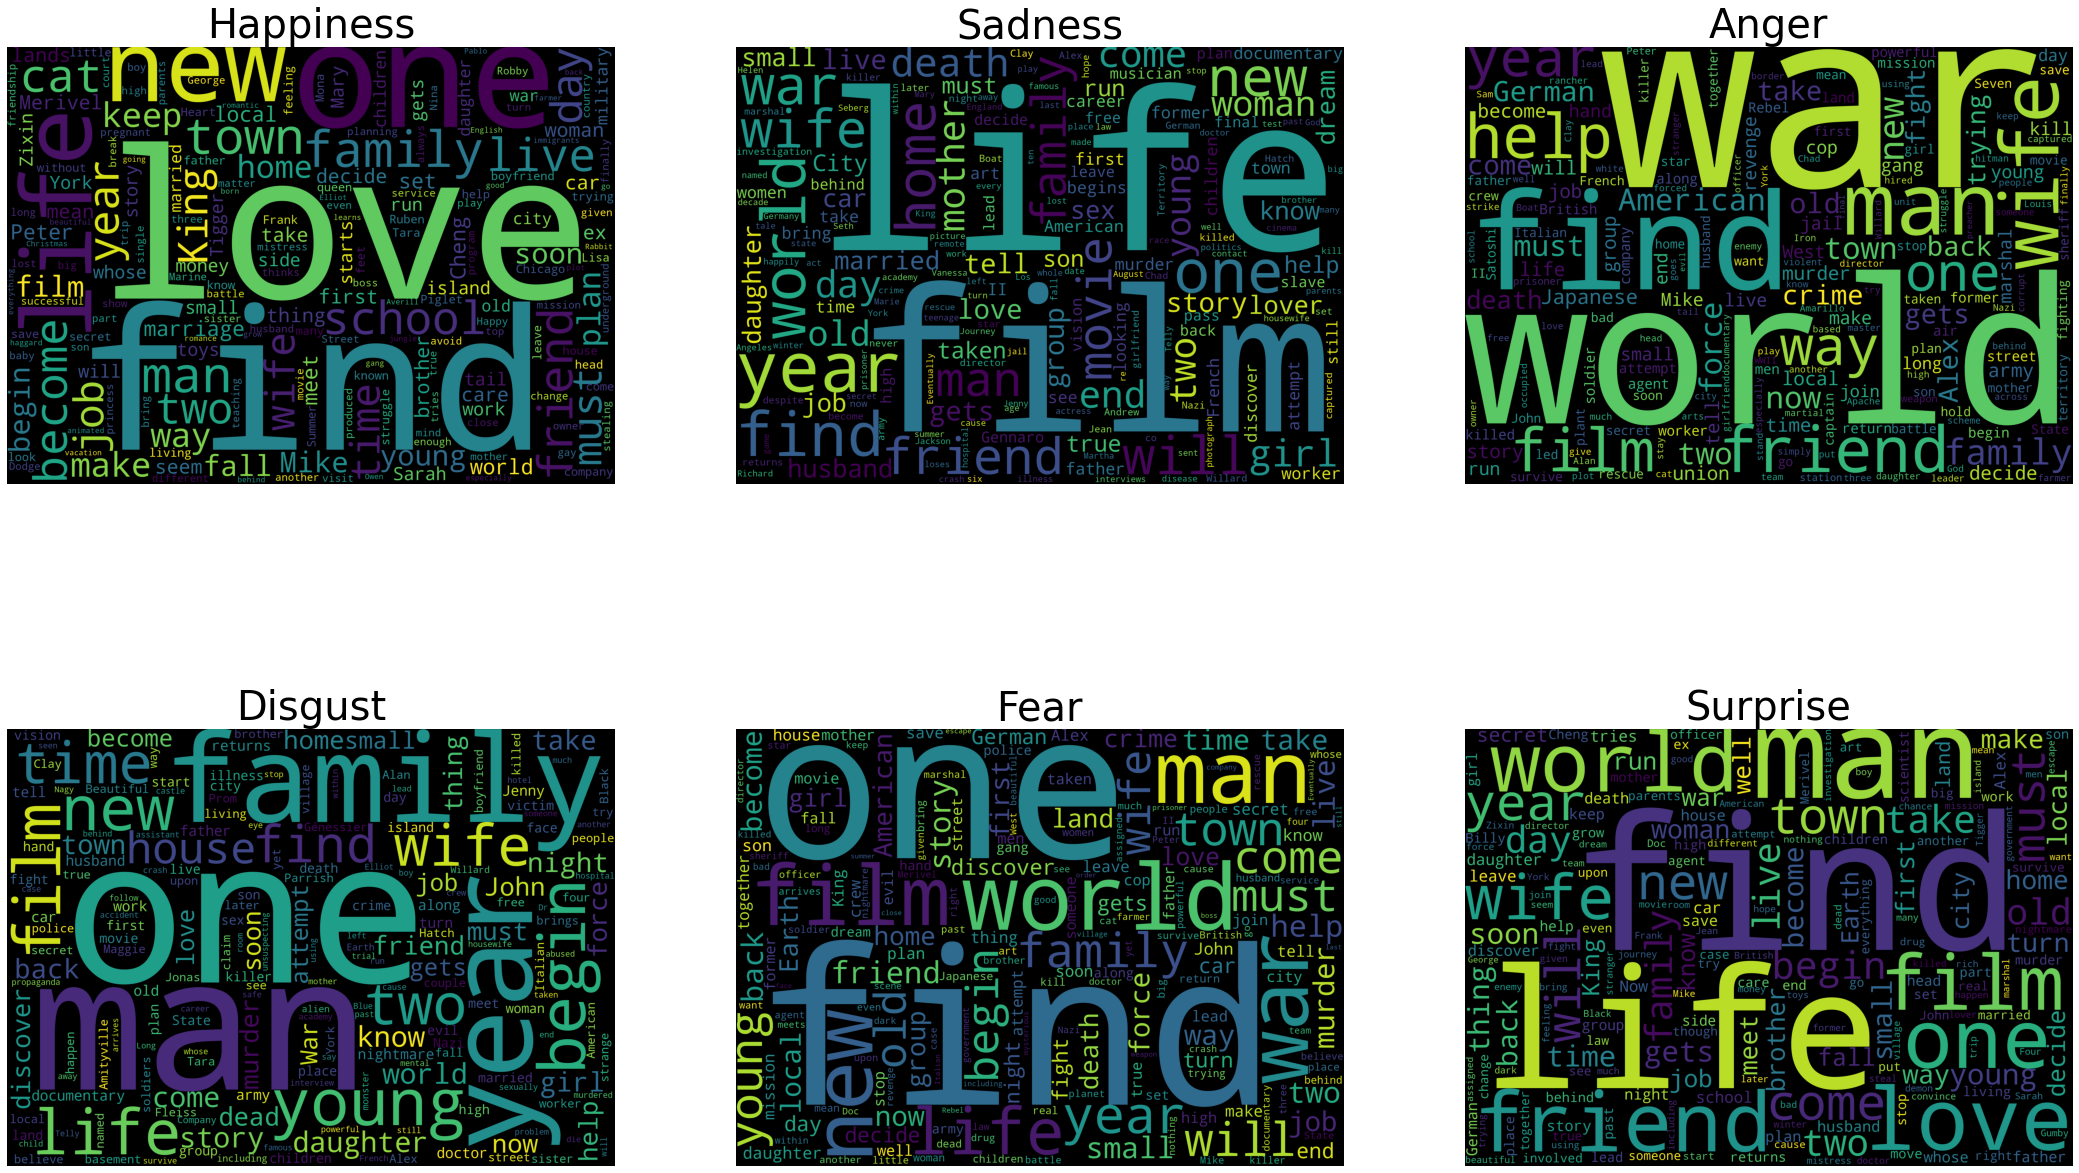

In [26]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(37,23))

# happiness
subset = labelled_df[labelled_df.happiness==1]
overviews = subset.overview.values
cloud_happiness = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Happiness",fontsize=40)
plt.imshow(cloud_happiness)


# sadness
subset = labelled_df[labelled_df.sadness==1]
overviews = subset.overview.values
cloud_sadness = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Sadness",fontsize=40)
plt.imshow(cloud_sadness)


# anger
subset = labelled_df[labelled_df.anger==1]
overviews = subset.overview.values
cloud_anger = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Anger",fontsize=40)
plt.imshow(cloud_anger)


# disgust
subset = labelled_df[labelled_df.disgust==1]
overviews = subset.overview.values
cloud_disgust = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Disgust",fontsize=40)
plt.imshow(cloud_disgust)


# fear
subset = labelled_df[labelled_df.fear==1]
overviews = subset.overview.values
cloud_fear = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Fear",fontsize=40)
plt.imshow(cloud_fear)


# surprise
subset = labelled_df[labelled_df.surprise==1]
overviews = subset.overview.values
cloud_surprise = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Surprise",fontsize=40)
plt.imshow(cloud_surprise)

plt.show()

##### General - labelled_df

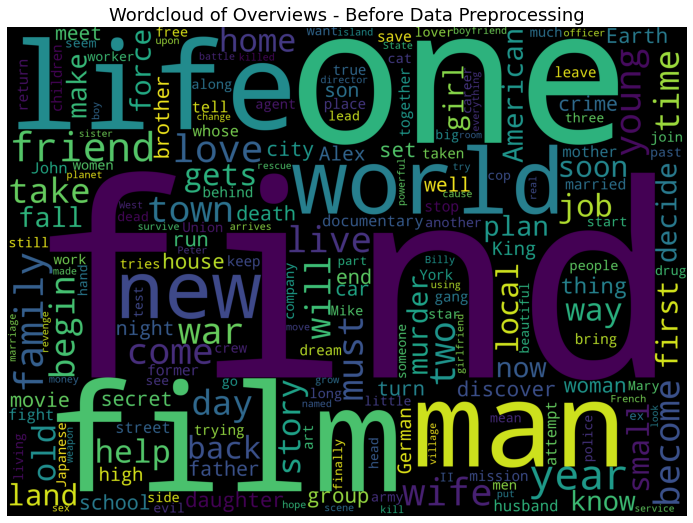

In [27]:
plt.figure(figsize=(15,9))
# clean
subset = labelled_df
text = subset.overview.values
cloud_general = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Wordcloud of Overviews - Before Data Preprocessing",fontsize=18)
plt.imshow(cloud_general)

##### General - movies_final_3

In [28]:
'''
plt.figure(figsize=(15,9))
# clean
subset = movies_final_3
text = subset.overview.values
cloud_general = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Wordcloud of Overviews - Before Data Preprocessing",fontsize=18)
plt.imshow(cloud_general)
'''

'\nplt.figure(figsize=(15,9))\n# clean\nsubset = movies_final_3\ntext = subset.overview.values\ncloud_general = WordCloud(\n                          stopwords=STOPWORDS,\n                          background_color=\'black\',\n                          collocations=False,\n                          width=2500,\n                          height=1800\n                         ).generate(" ".join(text))\nplt.axis(\'off\')\nplt.title("Wordcloud of Overviews - Before Data Preprocessing",fontsize=18)\nplt.imshow(cloud_general)\n'

# Correlation Matrix in labelled_df


In [29]:
correlation_matrix= labelled_df.corr()
print("Correlation matrix for happiness: \n\n{}".format(correlation_matrix["happiness"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for sadness: \n\n{}".format(correlation_matrix["sadness"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for anger: \n\n{}".format(correlation_matrix["anger"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for disgust: \n\n{}".format(correlation_matrix["disgust"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for fear: \n\n{}".format(correlation_matrix["fear"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for surprise: \n\n{}".format(correlation_matrix["surprise"].sort_values(ascending=False)))

Correlation matrix for happiness: 

happiness         1.000000
Vader_compound    0.222108
surprise          0.168165
NMF_topic         0.059806
movieId          -0.020300
tmdbId           -0.111893
disgust          -0.273727
anger            -0.297119
sadness          -0.305613
fear             -0.496887
Name: happiness, dtype: float64
Correlation matrix for sadness: 

sadness           1.000000
tmdbId            0.145288
fear              0.094136
disgust           0.061931
NMF_topic         0.049884
anger             0.005554
movieId          -0.005215
surprise         -0.133891
Vader_compound   -0.136663
happiness        -0.305613
Name: sadness, dtype: float64
Correlation matrix for anger: 

anger             1.000000
fear              0.266880
NMF_topic         0.054291
tmdbId            0.026631
movieId           0.010547
sadness           0.005554
disgust          -0.109123
Vader_compound   -0.217280
happiness        -0.297119
surprise         -0.331422
Name: anger, dtype: float6

# Visualisation

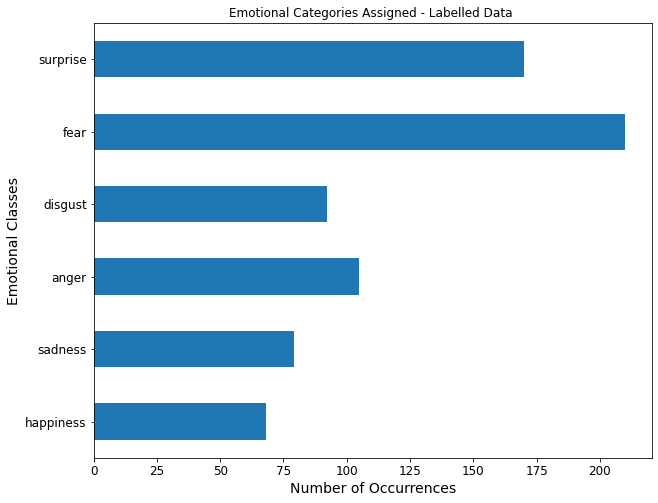

In [30]:
emotions= labelled_df[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel("Number of Occurrences")
plt.ylabel("Emotional Classes")
plt.title("Emotional Categories Assigned - Labelled Data ")

emotions.sum(axis=0).plot.barh()

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

### Data Cleaning & Preprocessing

 the first step in the text classification model is to create a function responsible for cleaning the text.

Cleaning Data

Data preprocessing with regard to movie overviews:

* convert to lower-case
* removal of html tags, punctuation, non-alphabetic characters
* removal of stopwords, and adding some few other words in the stopwords list
* fixing some informal text in the vocabulary, e.g. what's -> what is
* stemming (transform/convert words with roughly the same semantics to one standard form. For example, for amusing, amusement, and amused, the stem would be amus.)

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

"""
if not sys.warnoptions:
    warnings.simplefilter("ignore")
"""

'\nif not sys.warnoptions:\n    warnings.simplefilter("ignore")\n'

In [34]:
def clean_text(text):
    text = text.lower() 
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

def clean_html(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def clean_punctuations(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keep_alpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

# stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def remove_stopwords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

# stemming 
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


# apply in labelled dataframe
labelled_df["overview"]= labelled_df["overview"].apply(clean_text)

labelled_df["overview"]= labelled_df["overview"].apply(clean_html)

labelled_df["overview"]= labelled_df["overview"].apply(clean_punctuations)

labelled_df["overview"]= labelled_df["overview"].apply(keep_alpha)

labelled_df["overview"]= labelled_df["overview"].apply(remove_stopwords)

labelled_df["overview"]= labelled_df["overview"].apply(stemming)




labelled_df["title"]= labelled_df["title"].apply(clean_text)

labelled_df["title"]= labelled_df["title"].apply(clean_html)

labelled_df["title"]= labelled_df["title"].apply(clean_punctuations)

labelled_df["title"]= labelled_df["title"].apply(keep_alpha)

labelled_df["title"]= labelled_df["title"].apply(remove_stopwords)

labelled_df["title"]= labelled_df["title"].apply(stemming)



labelled_df["genres"]= labelled_df["genres"].apply(clean_text)

labelled_df["genres"]= labelled_df["genres"].apply(clean_html)

labelled_df["genres"]= labelled_df["genres"].apply(clean_punctuations)

labelled_df["genres"]= labelled_df["genres"].apply(keep_alpha)

labelled_df["genres"]= labelled_df["genres"].apply(remove_stopwords)

labelled_df["genres"]= labelled_df["genres"].apply(stemming)


labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_text)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_html)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_punctuations)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(keep_alpha)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(remove_stopwords)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(stemming)




labelled_df["entities"]= labelled_df["entities"].apply(clean_text)

labelled_df["entities"]= labelled_df["entities"].apply(clean_html)

labelled_df["entities"]= labelled_df["entities"].apply(clean_punctuations)

labelled_df["entities"]= labelled_df["entities"].apply(keep_alpha)

labelled_df["entities"]= labelled_df["entities"].apply(remove_stopwords)

labelled_df["entities"]= labelled_df["entities"].apply(stemming)


'''
# apply in all dataframe
movies_final_3["overview"]= movies_final_3["overview"].apply(clean_text)

movies_final_3["overview"]= movies_final_3["overview"].apply(clean_html)

movies_final_3["overview"]= movies_final_3["overview"].apply(clean_punctuations)

movies_final_3["overview"]= movies_final_3["overview"].apply(keep_alpha)

movies_final_3["overview"]= movies_final_3["overview"].apply(remove_stopwords)

movies_final_3["overview"]= movies_final_3["overview"].apply(stemming)

'''

'''
# apply in unlabelled df
unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_text)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_html)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_punctuations)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(keep_alpha)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(remove_stopwords)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(stemming)

'''


'\n# apply in unlabelled df\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_text)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_html)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_punctuations)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(keep_alpha)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(remove_stopwords)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(stemming)\n\n'

In [35]:
# sample of how now the cleaned overviews look like in the labelled dataframe
labelled_df["overview"][:6]

0    georg bank recov daughter wed receiv news preg...
1    man daughter sudden taken championship hockey ...
2    epic look presid richard nixon man carri fate ...
3    ted bellhop first night job hotel unusu guest ...
4    summon ashram tibet ace find peril journey jun...
5    evil iago pretend friend othello order manipul...
Name: overview, dtype: object

In [36]:
'''
# sample of how now the cleaned overviews look like in the whole dataframe
movies_final_3["overview"][:6]

'''

'\n# sample of how now the cleaned overviews look like in the whole dataframe\nmovies_final_3["overview"][:6]\n\n'

## Feature Engineering

Fixing the feature "Vader_score" as it appears as a json-dictionary object. Also converting the types of other features in a right way for the subsequent encoding of them into numerical values

### Fixing "Vader_Score"

In [37]:
# fixing attribute Vader_score which is like a dictionary of values

labelled_df.Vader_score[:2]

0    {'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...
1    {'neg': 0.099, 'neu': 0.759, 'pos': 0.143, 'co...
Name: Vader_score, dtype: object

In [38]:
from pandas.api.types import is_dict_like
is_dict_like(labelled_df.Vader_score)

True

#### Fixing it in `labelled_df`

In [39]:
# converting the Vader_score attribute into an object type
labelled_df["Vader_score"] = labelled_df["Vader_score"].astype("object")

# converting the below categorical attributes into type "category"
# they will then be label encoded and one_hot_encoded
labelled_df["title"] = labelled_df["title"].astype("category")

labelled_df["genres"] = labelled_df["genres"].astype("category")

labelled_df["Vader_polarity"] = labelled_df["Vader_polarity"].astype("category")

labelled_df["NMF_topic_description"] = labelled_df["NMF_topic_description"].astype("category")

labelled_df["entities"] = labelled_df["entities"].astype("category")


labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   movieId                300 non-null    int64   
 1   tmdbId                 300 non-null    float64 
 2   title                  300 non-null    category
 3   genres                 300 non-null    category
 4   overview               300 non-null    object  
 5   Vader_score            300 non-null    object  
 6   Vader_compound         300 non-null    float64 
 7   Vader_polarity         300 non-null    category
 8   NMF_topic              300 non-null    int64   
 9   NMF_topic_description  300 non-null    category
 10  entities               300 non-null    category
 11  happiness              300 non-null    int64   
 12  sadness                300 non-null    int64   
 13  anger                  300 non-null    int64   
 14  disgust                300 non-null    int

In [40]:
labelled_df["Vader_score"] = labelled_df["Vader_score"].apply(lambda x: dict(eval(x)))

In [41]:
df_temp= labelled_df["Vader_score"].apply(pd.Series)
df_temp[:3]

,neg,neu,pos,compound
0,0.000,0.944,0.056,0.5023
1,0.099,0.759,0.143,0.4404
2,0.229,0.771,0.000,-0.8658


In [42]:
result= pd.concat([df_temp, labelled_df], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)
result.shape
# 2 new columns added (2 columns removed, 4 were added)
# "Vader_score" is not needed anymore since its values are now displayed as new columns
# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score
# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"
# (300, 19)

(300, 19)

In [43]:
labelled_df=result
labelled_df.shape

(300, 19)

In [44]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   neg                    300 non-null    float64 
 1   neu                    300 non-null    float64 
 2   pos                    300 non-null    float64 
 3   compound               300 non-null    float64 
 4   movieId                300 non-null    int64   
 5   tmdbId                 300 non-null    float64 
 6   title                  300 non-null    category
 7   genres                 300 non-null    category
 8   overview               300 non-null    object  
 9   Vader_polarity         300 non-null    category
 10  NMF_topic              300 non-null    int64   
 11  NMF_topic_description  300 non-null    category
 12  entities               300 non-null    category
 13  happiness              300 non-null    int64   
 14  sadness                300 non-null    int

In [45]:
labelled_df.head(1)

,neg,neu,pos,compound,movieId,tmdbId,title,genres,overview,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,0.0,0.944,0.056,0.5023,5,11862.0,father bride part ii,comedi,georg bank recov daughter wed receiv news preg...,positive,0,battl offenc,person person person person,1,0,0,0,0,1


In [46]:
# changing the order of columns

labelled_df =  labelled_df[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]
labelled_df.shape

(300, 19)

In [47]:
labelled_df.head(1)

,movieId,tmdbId,title,genres,overview,Vader_polarity,compound,neg,neu,pos,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,5,11862.0,father bride part ii,comedi,georg bank recov daughter wed receiv news preg...,positive,0.5023,0.0,0.944,0.056,0,battl offenc,person person person person,1,0,0,0,0,1


#### Fixing it in the whole dataset

> Applying the same changes into the whole df (movies_final_3) and the unlabelled df (unlabelled_df), which is the result of movies_final_3 minus the labelled_df

In [48]:
#movies_final_3.shape

In [49]:
'''
# converting the Vader_score attribute into an object type
movies_final_3["Vader_score"] = movies_final_3["Vader_score"].astype("object")

# converting the below categorical attributes into type "category"
# they will then be label encoded and one_hot_encoded
movies_final_3["title"] = movies_final_3["title"].astype("category")

movies_final_3["genres"] = movies_final_3["genres"].astype("category")

movies_final_3["Vader_polarity"] = movies_final_3["Vader_polarity"].astype("category")

movies_final_3["NMF_topic_description"] = movies_final_3["NMF_topic_description"].astype("category")

movies_final_3["entities"] = movies_final_3["entities"].astype("category")


movies_final_3.info()

'''

'\n# converting the Vader_score attribute into an object type\nmovies_final_3["Vader_score"] = movies_final_3["Vader_score"].astype("object")\n\n# converting the below categorical attributes into type "category"\n# they will then be label encoded and one_hot_encoded\nmovies_final_3["title"] = movies_final_3["title"].astype("category")\n\nmovies_final_3["genres"] = movies_final_3["genres"].astype("category")\n\nmovies_final_3["Vader_polarity"] = movies_final_3["Vader_polarity"].astype("category")\n\nmovies_final_3["NMF_topic_description"] = movies_final_3["NMF_topic_description"].astype("category")\n\nmovies_final_3["entities"] = movies_final_3["entities"].astype("category")\n\n\nmovies_final_3.info()\n\n'

In [50]:
'''
from pandas.api.types import is_dict_like
is_dict_like(movies_final_3.Vader_score)

'''

'\nfrom pandas.api.types import is_dict_like\nis_dict_like(movies_final_3.Vader_score)\n\n'

In [51]:
#movies_final_3["Vader_score"] = movies_final_3["Vader_score"].apply(lambda x: dict(eval(x)))

In [52]:
'''
df_temp= movies_final_3["Vader_score"].apply(pd.Series)
df_temp[:3]
'''

'\ndf_temp= movies_final_3["Vader_score"].apply(pd.Series)\ndf_temp[:3]\n'

In [53]:
'''

result= pd.concat([df_temp, movies_final_3], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)
result.shape
# 2 new columns added (2 columns removed, 4 were added)
# "Vader_score" is not needed anymore since its values are now displayed as new columns
# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score
# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"
# (55877, 19)

'''

'\n\nresult= pd.concat([df_temp, movies_final_3], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)\nresult.shape\n# 2 new columns added (2 columns removed, 4 were added)\n# "Vader_score" is not needed anymore since its values are now displayed as new columns\n# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score\n# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"\n# (55877, 19)\n\n'

In [54]:
'''
movies_final_3=result
movies_final_3.shape

'''

'\nmovies_final_3=result\nmovies_final_3.shape\n\n'

In [55]:
'''

# changing the order of columns

movies_final_3 =  movies_final_3[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]
movies_final_3.shape

'''

'\n\n# changing the order of columns\n\nmovies_final_3 =  movies_final_3[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]\nmovies_final_3.shape\n\n'

In [56]:
#movies_final_3.head(1)

#### Fixing it in unlabelled_df

In [57]:
unlabelled_df.shape

(55577, 17)

In [58]:

# converting the Vader_score attribute into an object type
unlabelled_df["Vader_score"] = unlabelled_df["Vader_score"].astype("object")

# converting the below categorical attributes into type "category"
# they will then be label encoded and one_hot_encoded
unlabelled_df["title"] = unlabelled_df["title"].astype("category")

unlabelled_df["genres"] = unlabelled_df["genres"].astype("category")

unlabelled_df["Vader_polarity"] = unlabelled_df["Vader_polarity"].astype("category")

unlabelled_df["NMF_topic_description"] = unlabelled_df["NMF_topic_description"].astype("category")

unlabelled_df["entities"] = unlabelled_df["entities"].astype("category")


unlabelled_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55577 entries, 0 to 55576
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   movieId                55577 non-null  int64   
 1   tmdbId                 55577 non-null  float64 
 2   title                  55577 non-null  category
 3   genres                 55577 non-null  category
 4   overview               55577 non-null  object  
 5   Vader_score            55577 non-null  object  
 6   Vader_compound         55577 non-null  float64 
 7   Vader_polarity         55577 non-null  category
 8   NMF_topic              55577 non-null  int64   
 9   NMF_topic_description  55577 non-null  category
 10  entities               55577 non-null  category
 11  happiness              0 non-null      float64 
 12  sadness                0 non-null      float64 
 13  anger                  0 non-null      float64 
 14  disgust                0 non-null     

In [59]:

from pandas.api.types import is_dict_like
is_dict_like(unlabelled_df.Vader_score)


True

In [60]:
unlabelled_df["Vader_score"] = unlabelled_df["Vader_score"].apply(lambda x: dict(eval(x)))

In [61]:
df_temp= unlabelled_df["Vader_score"].apply(pd.Series)
df_temp[:3]

,neg,neu,pos,compound
0,0.048,0.886,0.066,0.2500
1,0.161,0.702,0.137,-0.4588
2,0.168,0.791,0.041,-0.7645


In [62]:
result= pd.concat([df_temp, unlabelled_df], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)
result.shape
# 2 new columns added (2 columns removed, 4 were added)
# "Vader_score" is not needed anymore since its values are now displayed as new columns
# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score
# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"
# (55,577, 19)

(55577, 19)

In [63]:
unlabelled_df=result
unlabelled_df.shape

(55577, 19)

In [64]:
# changing the order of columns

unlabelled_df =  unlabelled_df[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]
unlabelled_df.shape

(55577, 19)

In [65]:
unlabelled_df.head(1)

,movieId,tmdbId,title,genres,overview,Vader_polarity,compound,neg,neu,pos,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",positive,0.25,0.048,0.886,0.066,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...,NaN,NaN,NaN,NaN,NaN,NaN


# References

[Usman Malik - Word embeddings](https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/) & [Usman Malik](https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/) & [Usman Malik](https://stackabuse.com/python-for-nlp-creating-multi-data-type-classification-models-with-keras/)

[Aman Sawarn
](https://medium.com/towards-artificial-intelligence/keras-for-multi-label-text-classification-86d194311d0e)


[Rocco Schulz](https://blog.mimacom.com/text-classification/)


# DL Models - Overviews


In [66]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

import sklearn.metrics as metrics
from sklearn.metrics import f1_score

import tensorflow as tf # open source Deep Leaning library
from tensorflow import keras # Deep Learning API

## Word Embeddings with LSTM

Converting the text in the movie overviews into embedded vectors using GloVe word embeddings for converting the text inputs to their numeric counterparts. Using LSTM in keras in order to take into account the sequential nature of text

* `activation function` will be `sigmoid`. The advantage of using sigmoid over other activation functions, such as that of Softmax lies in the fact that one movie overview can have many emotions (since it is a multilabel task). If Softmax funtion was used then this would mean that the probability of occurence of one emotion depends on the occurence of other emotions, a fact which would not be desirable since the final aim is the prediction of each emotion separately and independently from the occurrence of the others

* The purpose of loss functions is to compute the quantity that a model should seek to minimize during training. `loss` will be computed with `binary cross entropy`, because based on the [documentation](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class) it can be suitable for when there are only two label classes, assumed to be 0 and 1 as in this particular task (as opposed e.g. with CategoricalCrossentropy which is suggested to be used when there are two or more label classes)


### Multiple Output Layers


In [67]:
X = list(labelled_df["overview"])  

y = labelled_df[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

The y variable contains the combined output from 6 labels

In [68]:
# First output
y1_train = y_train[["happiness"]].values
y1_test =  y_test[["happiness"]].values

# Second output
y2_train = y_train[["sadness"]].values
y2_test =  y_test[["sadness"]].values

# Third output
y3_train = y_train[["anger"]].values
y3_test =  y_test[["anger"]].values

# Fourth output
y4_train = y_train[["disgust"]].values
y4_test =  y_test[["disgust"]].values

# Fifth output
y5_train = y_train[["fear"]].values
y5_test =  y_test[["fear"]].values

# Sixth output
y6_train = y_train[["surprise"]].values
y6_test =  y_test[["surprise"]].values

In [69]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [70]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

downloaded = drive.CreateFile({'id':'1g78LQTNhay8fbRClLDU-7PDvqxiIZBW1'}) 
downloaded.GetContentFile('glove.6B.100d.txt') 
glove_file = "/content/glove.6B.100d.txt"
glove_file = open(glove_file, "r", encoding="utf8")
 
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [71]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)

output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output6 = Dense(1, activation='sigmoid')(LSTM_Layer1)

model = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 100)     341700      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 128)          117248      embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            129         lstm[0][0]                       
_______________________________________________________________________________________

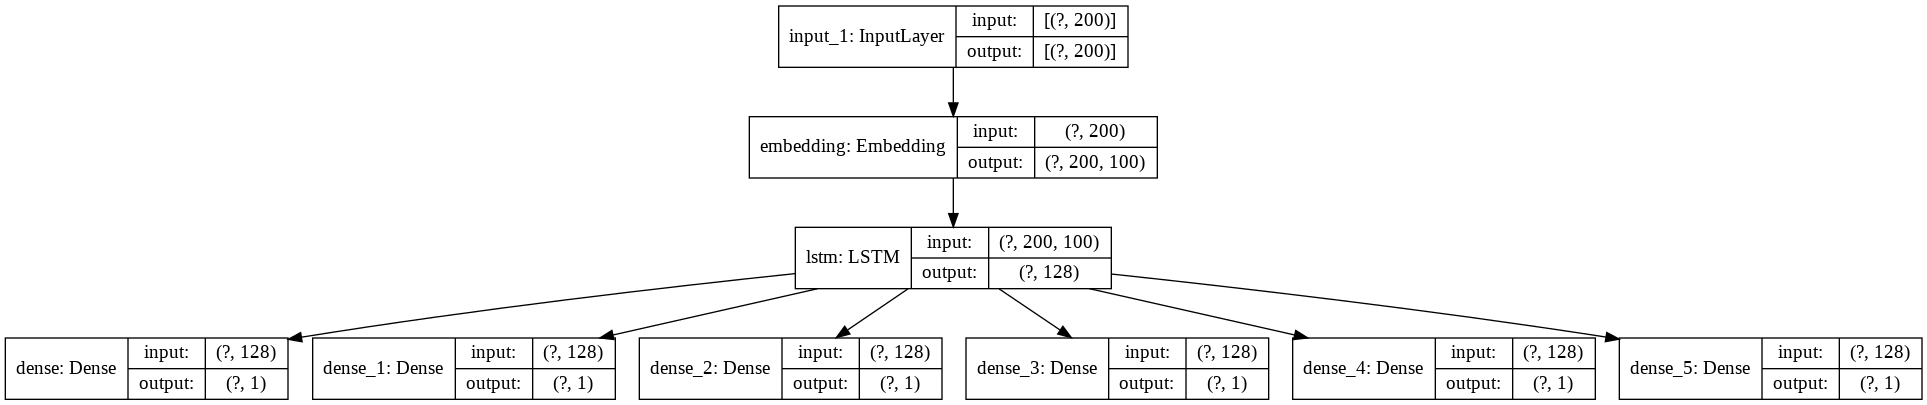

In [72]:
# architecture of neural model
keras.utils.plot_model(model, show_shapes=True)

In [73]:
# X_train has 90% of df, i.e. 270/300 rows
# since I want 10% of df for validation, this is ¬0.11*x_train's rows


history = model.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train], batch_size=300, epochs=20, verbose=1, validation_split=0.111)

Epoch 1/20
1/1 [==============================] - 1s 812ms/step - loss: 4.1589 - dense_loss: 0.6931 - dense_1_loss: 0.6931 - dense_2_loss: 0.6931 - dense_3_loss: 0.6931 - dense_4_loss: 0.6931 - dense_5_loss: 0.6931 - dense_acc: 0.7750 - dense_1_acc: 0.7292 - dense_2_acc: 0.6458 - dense_3_acc: 0.6625 - dense_4_acc: 0.2792 - dense_5_acc: 0.4333 - val_loss: 4.1518 - val_dense_loss: 0.6920 - val_dense_1_loss: 0.6905 - val_dense_2_loss: 0.6921 - val_dense_3_loss: 0.6916 - val_dense_4_loss: 0.6926 - val_dense_5_loss: 0.6931 - val_dense_acc: 0.7333 - val_dense_1_acc: 0.8000 - val_dense_2_acc: 0.6667 - val_dense_3_acc: 0.8333 - val_dense_4_acc: 0.5667 - val_dense_5_acc: 0.6000
Epoch 2/20
1/1 [==============================] - 0s 77ms/step - loss: 4.1519 - dense_loss: 0.6918 - dense_1_loss: 0.6911 - dense_2_loss: 0.6922 - dense_3_loss: 0.6924 - dense_4_loss: 0.6913 - dense_5_loss: 0.6931 - dense_acc: 0.7750 - dense_1_acc: 0.7292 - dense_2_acc: 0.6458 - dense_3_acc: 0.6625 - dense_4_acc: 0.7208 

In [74]:
score = model.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test], verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

1/1 [==============================] - 0s 2ms/step - loss: 3.6052 - dense_loss: 0.5009 - dense_1_loss: 0.5806 - dense_2_loss: 0.6366 - dense_3_loss: 0.5289 - dense_4_loss: 0.6572 - dense_5_loss: 0.7010 - dense_acc: 0.8000 - dense_1_acc: 0.7333 - dense_2_acc: 0.6667 - dense_3_acc: 0.8000 - dense_4_acc: 0.6667 - dense_5_acc: 0.5333
Test Score: 3.6052396297454834
Test Accuracy: 0.5008714199066162


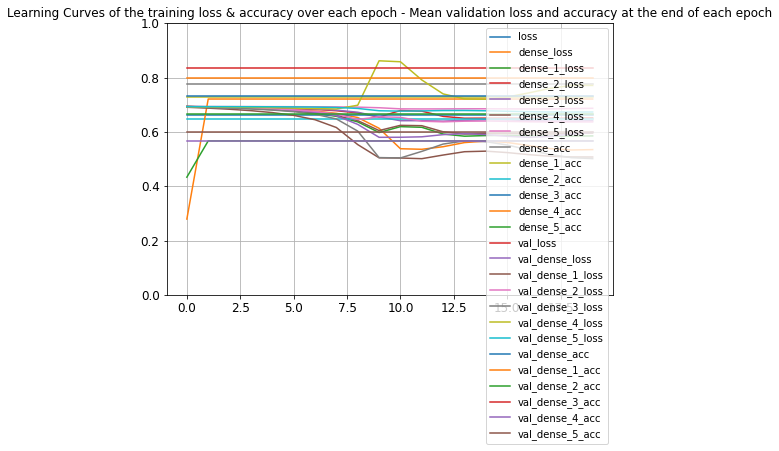

In [75]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting the vertical range to [0,1]
plt.title('Learning Curves of the training loss & accuracy over each epoch - Mean validation loss and accuracy at the end of each epoch')
plt.show()

# Training and validation curves are close between them, 
# fact which implies that not too much overfitting is taking place


### Single Output Layer

Multi-lable Text Classification Model with Single Output Layer
The model has one input layer, one embedding layer, one LSTM layer with 128 neurons and one output layer with 6 neurons since there are 6 targets-labels in the output layer

#### Split into train-validation-test data

* train data: 80% (240/300)
* validation data: 10% (30/300)
* test data: 10% (30/300)

In [76]:
emotions = ["happiness", "sadness", "anger", "disgust", "fear", "surprise"]

targets= labelled_df[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]

from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test= train_test_split(list(labelled_df["overview"]), targets, test_size=0.1, random_state=42)

In [77]:
x_train, x_val, y_train, y_val= train_test_split(x_train_val, y_train_val, test_size=30, random_state=42)

In [78]:
print("Rows of x_train is: {}".format(len(x_train)))
print("Rows of x_val is: {}".format(len(x_val)))
print("Rows of x_test is: {}".format(len(x_test)))
print("==============================================")
print("Rows of y_train is: {}".format(len(y_train)))
print("Rows of y_val is: {}".format(len(y_val)))
print("Rows of y_test is: {}".format(len(y_test)))

Rows of x_train is: 240
Rows of x_val is: 30
Rows of x_test is: 30
Rows of y_train is: 240
Rows of y_val is: 30
Rows of y_test is: 30


In [79]:
maxlen = 200
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)

x_val= tokenizer.texts_to_sequences(x_val)
x_val = pad_sequences(x_val, padding='post', maxlen=maxlen)

x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

vocab_size = len(tokenizer.word_index) + 1

In [80]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

downloaded = drive.CreateFile({'id':'1g78LQTNhay8fbRClLDU-7PDvqxiIZBW1'}) 
downloaded.GetContentFile('glove.6B.100d.txt') 
glove_file = "/content/glove.6B.100d.txt"
glove_file = open(glove_file, "r", encoding="utf8")
 
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [81]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))

model.add(LSTM(128))

model.add(Dense(6, activation="sigmoid"))



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


'''
from keras.layers import Embedding
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding





# other way, with "add"
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))

model.add(LSTM(128))

model.add(Dense(6, activation="sigmoid"))



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())


other way, from https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/structured_data/feature_columns.ipynb#scrollTo=9dEreb4QKizj
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
model = tf.keras.Sequential([
  layers.Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False),
  layers.LSTM(128),
  layers.Dense(6, activation="sigmoid")
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())
'''


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          322600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
Total params: 440,622
Trainable params: 118,022
Non-trainable params: 322,600
_________________________________________________________________
None


'\nfrom keras.layers import Embedding\nfrom numpy import array\nfrom numpy import asarray\nfrom numpy import zeros\nfrom keras.preprocessing.text import Tokenizer\nfrom keras.preprocessing.sequence import pad_sequences\nfrom keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.layers import Flatten\nfrom keras.layers import Embedding\n\n\n\n\n\n# other way, with "add"\nmodel = Sequential()\nmodel.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))\n\nmodel.add(LSTM(128))\n\nmodel.add(Dense(6, activation="sigmoid"))\n\n\n\nmodel.compile(loss=\'binary_crossentropy\', optimizer=\'adam\', metrics=[\'acc\'])\nprint(model.summary())\n\n\nother way, from https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/structured_data/feature_columns.ipynb#scrollTo=9dEreb4QKizj\nimport tensorflow as tf\n\nfrom tensorflow import feature_column\nfrom tensorflow.keras import layers\nmodel = tf.keras.Sequenti

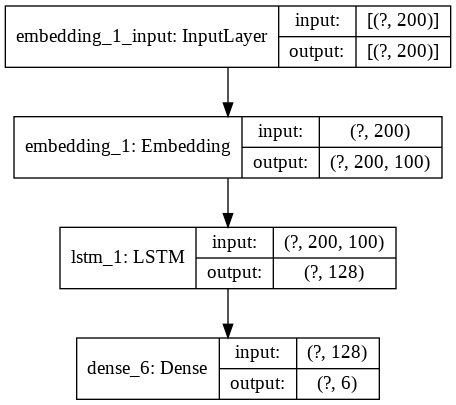

In [82]:
# architecture of neural model
keras.utils.plot_model(model, show_shapes=True)

In [83]:
early_stopping_model= keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(x_val, y_val), callbacks= [early_stopping_model])

Epoch 1/12
2/2 [==============================] - 1s 500ms/step - loss: 0.6926 - accuracy: 0.1167 - val_loss: 0.6908 - val_accuracy: 0.0667
Epoch 2/12
2/2 [==============================] - 1s 301ms/step - loss: 0.6897 - accuracy: 0.1125 - val_loss: 0.6873 - val_accuracy: 0.0667
Epoch 3/12
2/2 [==============================] - 1s 287ms/step - loss: 0.6855 - accuracy: 0.1125 - val_loss: 0.6811 - val_accuracy: 0.0667
Epoch 4/12
2/2 [==============================] - 1s 291ms/step - loss: 0.6771 - accuracy: 0.1125 - val_loss: 0.6666 - val_accuracy: 0.0667
Epoch 5/12
2/2 [==============================] - 1s 304ms/step - loss: 0.6564 - accuracy: 0.1125 - val_loss: 0.6279 - val_accuracy: 0.0667
Epoch 6/12
2/2 [==============================] - 1s 286ms/step - loss: 0.6321 - accuracy: 0.1125 - val_loss: 0.6488 - val_accuracy: 0.0667
Epoch 7/12
2/2 [==============================] - 1s 284ms/step - loss: 0.6204 - accuracy: 0.1125 - val_loss: 0.6299 - val_accuracy: 0.0667
Epoch 8/12
2/2 [====

In [84]:
validation_score= model.evaluate(x_val, y_val)
print(validation_score)

1/1 [==============================] - 0s 1ms/step - loss: 0.6334 - accuracy: 0.0667
[0.6334287524223328, 0.06666667014360428]


In [85]:
test_score = model.evaluate(x_test, y_test, verbose=3)
print(test_score)

#print("Test Score:", test_score[0])
#print("Test Accuracy:", test_score[1])

# val 67.22&
# test 0.699999988079071

[0.5979108214378357, 0.10000000149011612]


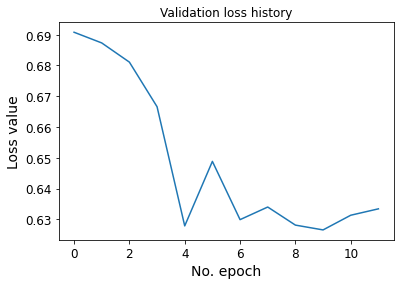

In [86]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

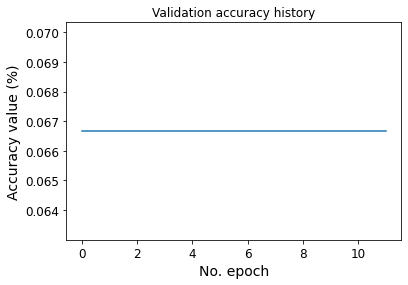

In [87]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

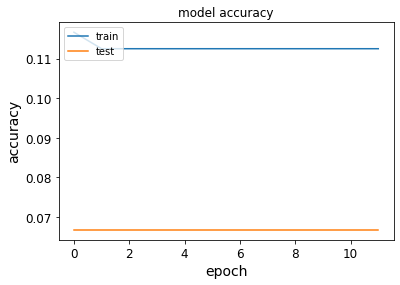

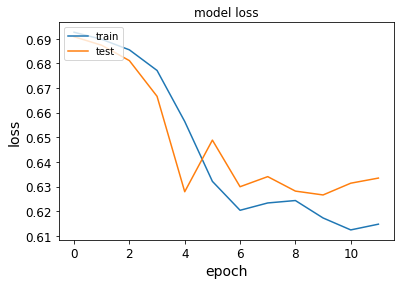

In [88]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

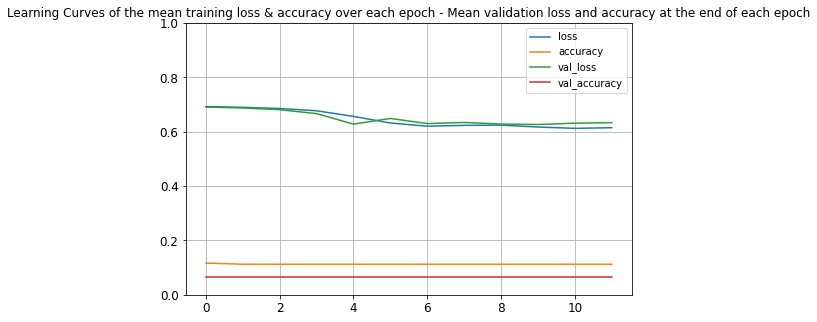

In [89]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting the vertical range to [0,1]
plt.title('Learning Curves of the mean training loss & accuracy over each epoch - Mean validation loss and accuracy at the end of each epoch')
plt.show()

# Training and validation curves are close between them, 
# fact which implies that not too much overfitting is taking place

In [90]:
'''
model_overview = "LSTM_single out"

count=1
# saving predictions in a dataframe
predictions_df = pd.DataFrame()

for emotion in emotions:

  print('{}:'.format(emotion))

  history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(x_val, y_val))

  predictions= model.predict(x_val)

  if count==1:
    predictions_df["happiness"] = predictions

    subset_accuracy = model.evaluate(y_val[emotion], predictions, verbose=3)
    print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
  
  elif count==2:
    predictions_df["sadness"] = predictions

    subset_accuracy = model.evaluate(y_val[emotion], predictions, verbose=3)
    print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))

  elif count==3:
    predictions_df["anger"] = predictions

    subset_accuracy = model.evaluate(y_val[emotion], predictions, verbose=3)
    print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))

  elif count==4:
    predictions_df["disgust"] = predictions

    subset_accuracy = model.evaluate(y_val[emotion], predictions, verbose=3)
    print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))

  elif count==5:
    predictions_df["fear"] = predictions

    subset_accuracy = model.evaluate(y_val[emotion], predictions, verbose=3)
    print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))

  elif count==6:
    predictions_df["disgust"] = predictions
    
    subset_accuracy = model.evaluate(y_val[emotion], predictions, verbose=3)
    print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))


mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))

y_true= y_val
y_pred= predictions_df.values

f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_metadata, f1_result))

    

'''

'\nmodel_overview = "LSTM_single out"\n\ncount=1\n# saving predictions in a dataframe\npredictions_df = pd.DataFrame()\n\nfor emotion in emotions:\n\n  print(\'{}:\'.format(emotion))\n\n  history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(x_val, y_val))\n\n  predictions= model.predict(x_val)\n\n  if count==1:\n    predictions_df["happiness"] = predictions\n\n    subset_accuracy = model.evaluate(y_val[emotion], predictions, verbose=3)\n    print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))\n  \n  elif count==2:\n    predictions_df["sadness"] = predictions\n\n    subset_accuracy = model.evaluate(y_val[emotion], predictions, verbose=3)\n    print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))\n\n  elif count==3:\n    predictions_df["anger"] = predictions\n\n    subset_accuracy = model.evaluate(y_val[emotion], predictions, verbose=3)\n    print("Subset Accuracy of {0}

In [91]:
###########################################

#### Benchmark of DNNs

In [92]:
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Dropout(0.15))
model.add(GlobalMaxPool1D())
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer=Adam(0.015), loss='binary_crossentropy', metrics=['accuracy'])


early_stopping_model= keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_global=model
history = model_global.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(x_val, y_val), callbacks= [early_stopping_model])

Epoch 1/12
2/2 [==============================] - 0s 77ms/step - loss: 0.9219 - accuracy: 0.1875 - val_loss: 0.6380 - val_accuracy: 0.0667
Epoch 2/12
2/2 [==============================] - 0s 21ms/step - loss: 0.6862 - accuracy: 0.1042 - val_loss: 0.7369 - val_accuracy: 0.0000e+00
Epoch 3/12
2/2 [==============================] - 0s 21ms/step - loss: 0.7585 - accuracy: 0.0208 - val_loss: 0.7536 - val_accuracy: 0.0667
Epoch 4/12
2/2 [==============================] - 0s 21ms/step - loss: 0.7308 - accuracy: 0.0750 - val_loss: 0.6860 - val_accuracy: 0.0667
Epoch 5/12
2/2 [==============================] - 0s 22ms/step - loss: 0.7019 - accuracy: 0.1083 - val_loss: 0.6687 - val_accuracy: 0.0667
Epoch 6/12
2/2 [==============================] - 0s 21ms/step - loss: 0.6916 - accuracy: 0.1042 - val_loss: 0.6549 - val_accuracy: 0.1000
Epoch 7/12
2/2 [==============================] - 0s 22ms/step - loss: 0.6486 - accuracy: 0.1083 - val_loss: 0.6690 - val_accuracy: 0.0333
Epoch 8/12
2/2 [=======

In [93]:
validation_score= model_global.evaluate(x_val, y_val)
print(validation_score)

1/1 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.0333
[0.6557600498199463, 0.03333333507180214]


In [94]:

test_score = model_global.evaluate(x_test, y_test, verbose=3)
print(test_score)

[0.6120759844779968, 0.10000000149011612]


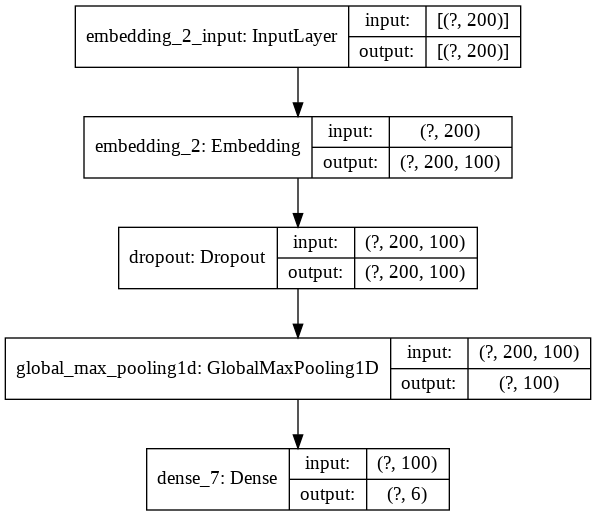

In [95]:
keras.utils.plot_model(model_global, show_shapes=True)

In [96]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))

model.add(LSTM(128))

model.add(Dense(6, activation="sigmoid"))



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model.summary())

early_stopping_model= keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=128, verbose=1, validation_data=(x_val, y_val), callbacks= [early_stopping_model])

Epoch 1/128
8/8 [==============================] - 2s 213ms/step - loss: 0.6874 - accuracy: 0.1125 - val_loss: 0.6664 - val_accuracy: 0.0000e+00
Epoch 2/128
8/8 [==============================] - 1s 162ms/step - loss: 0.6307 - accuracy: 0.0708 - val_loss: 0.6299 - val_accuracy: 0.0667
Epoch 3/128
8/8 [==============================] - 1s 162ms/step - loss: 0.6172 - accuracy: 0.1125 - val_loss: 0.6351 - val_accuracy: 0.0667
Epoch 4/128
8/8 [==============================] - 1s 159ms/step - loss: 0.6142 - accuracy: 0.1125 - val_loss: 0.6249 - val_accuracy: 0.0667
Epoch 5/128
8/8 [==============================] - 1s 162ms/step - loss: 0.6135 - accuracy: 0.1125 - val_loss: 0.6256 - val_accuracy: 0.0667
Epoch 6/128
8/8 [==============================] - 1s 161ms/step - loss: 0.6210 - accuracy: 0.1500 - val_loss: 0.6334 - val_accuracy: 0.0667
Epoch 7/128
8/8 [==============================] - 1s 160ms/step - loss: 0.6321 - accuracy: 0.1125 - val_loss: 0.6423 - val_accuracy: 0.0667
Epoch 8/1

In [97]:
validation_score= model.evaluate(x_val, y_val)
print(validation_score)

1/1 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.0667
[0.6249083280563354, 0.06666667014360428]


In [98]:
test_score = model.evaluate(x_test, y_test, verbose=3)
print(test_score)

[0.601316511631012, 0.10000000149011612]


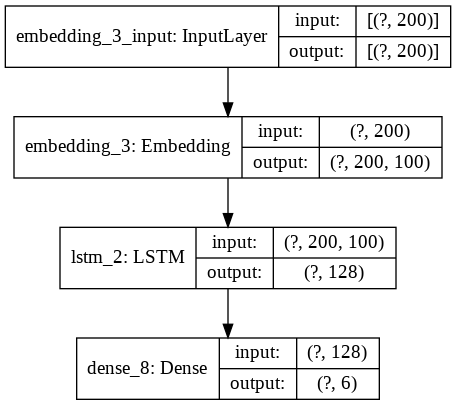

In [99]:
keras.utils.plot_model(model, show_shapes=True)

In [100]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam


filter_length = 300

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))
model.add(Dropout(0.1))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

early_stopping_model= keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(x_val, y_val), callbacks= [early_stopping_model])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 100)          322600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 198, 300)          90300     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 1806      
_________________________________________________________________
activation (Activation)      (None, 6)                 0         
Total params: 414,706
Trainable params: 414,706
Non-trainable params: 0
________________________________________________

In [101]:

validation_score= model.evaluate(x_val, y_val)
print(validation_score)

1/1 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.0667
[0.5555192828178406, 0.06666667014360428]


In [102]:
test_score = model.evaluate(x_test, y_test, verbose=3)
print(test_score)

[0.5548830032348633, 0.10000000149011612]


In [103]:
predictions= model.predict(x_test)

In [104]:
predictions[0]

array([0.06327051, 0.28955695, 0.34135795, 0.32422322, 0.80683875,
       0.55456036], dtype=float32)

In [105]:
pred_prob= model.predict_proba(x_test)
pred_prob[0]

Instructions for updating:
Please use `model.predict()` instead.


array([0.06327051, 0.28955695, 0.34135795, 0.32422322, 0.80683875,
       0.55456036], dtype=float32)

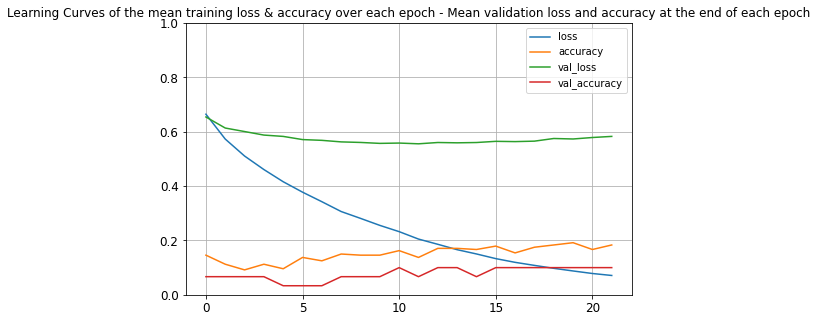

In [106]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting the vertical range to [0,1]
plt.title('Learning Curves of the mean training loss & accuracy over each epoch - Mean validation loss and accuracy at the end of each epoch')
plt.show()

# Training and validation curves are close between them, 
# fact which implies that not too much overfitting is taking place

In [107]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam


filter_length = 300

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))
model.add(Dropout(0.5))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

early_stopping_model= keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=80, verbose=1, validation_data=(x_val, y_val), callbacks= [early_stopping_model])



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 100)          322600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 300)          90300     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 300)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 1806      
_________________________________________________________________
activation_1 (Activation)    (None, 6)                 0         
Total params: 414,706
Trainable params: 414,706
Non-trainable params: 0
________________________________________________

In [108]:
validation_score= model.evaluate(x_val, y_val)
print(validation_score)

test_score = model.evaluate(x_test, y_test, verbose=3)
print(test_score)

1/1 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.1000
[0.546337902545929, 0.10000000149011612]
[0.562792181968689, 0.13333334028720856]


In [109]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam


filter_length = 300

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))
#model.add(Dropout(0.3))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.3))
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

early_stopping_model= keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=80, verbose=1, validation_data=(x_val, y_val), callbacks= [early_stopping_model])



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 100)          322600    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 198, 300)          90300     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 300)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 1806      
_________________________________________________________________
activation_2 (Activation)    (None, 6)                 0         
Total params: 414,706
Trainable params: 414,706
Non-trainable params: 0
________________________________________________

In [110]:
validation_score= model.evaluate(x_val, y_val)
print(validation_score)

test_score = model.evaluate(x_test, y_test, verbose=3)
print(test_score)

1/1 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.0333
[0.5785127282142639, 0.03333333507180214]
[0.5656052231788635, 0.10000000149011612]


In [111]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam


filter_length = 300

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.3))
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

early_stopping_model= keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=80, verbose=1, validation_data=(x_val, y_val), callbacks= [early_stopping_model])



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 100)          322600    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200, 100)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 198, 300)          90300     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 300)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 1806      
_________________________________________________________________
activation_3 (Activation)    (None, 6)                

In [112]:
validation_score= model.evaluate(x_val, y_val)
print(validation_score)

test_score = model.evaluate(x_test, y_test, verbose=3)
print(test_score)

1/1 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.0333
[0.5449448823928833, 0.03333333507180214]
[0.5491051077842712, 0.1666666716337204]


In [113]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam


filter_length = 300

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))
model.add(Dropout(0.3))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.3))
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model1= model
early_stopping_model1= keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history1 = model1.fit(x_train, y_train, batch_size=32, epochs=80, verbose=1, validation_data=(x_val, y_val), callbacks= [early_stopping_model])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 100)          322600    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200, 100)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 198, 300)          90300     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 300)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 1806      
_________________________________________________________________
activation_4 (Activation)    (None, 6)                

In [114]:
validation_score= model1.evaluate(x_val, y_val)
print(validation_score)

test_score = model1.evaluate(x_test, y_test, verbose=3)
print(test_score)

1/1 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.1000
[0.548008918762207, 0.10000000149011612]
[0.5731786489486694, 0.1666666716337204]


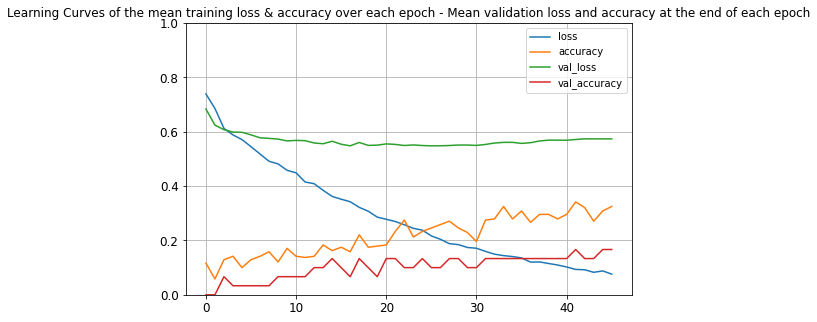

In [115]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting the vertical range to [0,1]
plt.title('Learning Curves of the mean training loss & accuracy over each epoch - Mean validation loss and accuracy at the end of each epoch')
plt.show()

# Training and validation curves are close between them, 
# fact which implies that not too much overfitting is taking place

In [116]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam


filter_length = 300

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))
model.add(Dropout(0.5))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.3))
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model2=model

early_stopping_model2= keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history2 = model.fit(x_train, y_train, batch_size=32, epochs=80, verbose=1, validation_data=(x_val, y_val), callbacks= [early_stopping_model2])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 200, 100)          322600    
_________________________________________________________________
dropout_8 (Dropout)          (None, 200, 100)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 198, 300)          90300     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 300)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 1806      
_________________________________________________________________
activation_5 (Activation)    (None, 6)                

In [117]:
validation_score= model2.evaluate(x_val, y_val)
print(validation_score)

test_score = model2.evaluate(x_test, y_test, verbose=3)
print(test_score)

1/1 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.1333
[0.5491617918014526, 0.13333334028720856]
[0.557092547416687, 0.1666666716337204]


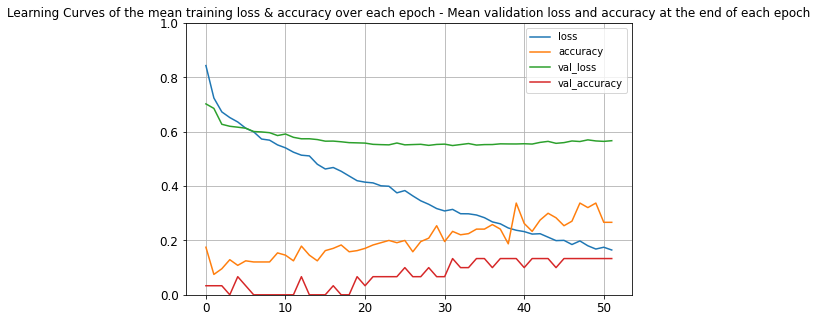

In [118]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting the vertical range to [0,1]
plt.title('Learning Curves of the mean training loss & accuracy over each epoch - Mean validation loss and accuracy at the end of each epoch')
plt.show()

# Training and validation curves are close between them, 
# fact which implies that not too much overfitting is taking place

# Metadata

Splitting the dataset the same way as before, in order to use some specific meta information and integrate them in the DNNs

In [119]:
emotions = ["happiness", "sadness", "anger", "disgust", "fear", "surprise"]

targets= labelled_df[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]

from sklearn.model_selection import train_test_split

x_train_val1, x_test1, y_train_val1, y_test1= train_test_split(labelled_df, targets, test_size=0.1, random_state=42)

In [120]:
x_train1, x_val1, y_train1, y_val1= train_test_split(x_train_val1, y_train_val1, test_size=30, random_state=42)

In [121]:
x_train1.head(1)

,movieId,tmdbId,title,genres,overview,Vader_polarity,compound,neg,neu,pos,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
120,1313,66034.0,mad dog time,crime,boss madhous mobster temporari boss crimin emp...,negative,-0.8176,0.288,0.712,0.0,0,battl offenc,none,0,0,1,0,1,0


In [122]:
x_train_metadata = x_train1[["Vader_polarity", "genres", "compound", "NMF_topic"]]
x_train_meta = x_train1[["Vader_polarity", "genres", "compound", "NMF_topic"]].values

x_val_metadata = x_val1[["Vader_polarity", "genres", "compound", "NMF_topic"]]
x_val_meta = x_val1[["Vader_polarity", "genres", "compound", "NMF_topic"]].values

x_test_metadata = x_test1[["Vader_polarity", "genres", "compound", "NMF_topic"]]
x_test_meta = x_test1[["Vader_polarity", "genres", "compound", "NMF_topic"]].values

In [123]:
print("Shape of x_train_metadata: {}".format(x_train_metadata.shape))
print("Shape of x_val_metadata: {}".format(x_val_metadata.shape))
print("Shape of x_test_metadata: {}".format(x_test_metadata.shape))

Shape of x_train_metadata: (240, 4)
Shape of x_val_metadata: (30, 4)
Shape of x_test_metadata: (30, 4)


In [124]:
x_train_metadata.head(1)

,Vader_polarity,genres,compound,NMF_topic
120,negative,crime,-0.8176,0


In [125]:
x_train1[["Vader_polarity", "genres", "compound", "NMF_topic"]].head(1)

,Vader_polarity,genres,compound,NMF_topic
120,negative,crime,-0.8176,0


In [126]:
# assigning the categorical variables

cat_var= ["genres", "Vader_polarity"]


# assigning the numerical variables
num_var= ["compound", "NMF_topic"]

# assigning the text attribute "overview"
text_var= ["overview"]

In [127]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

col_transformers= ColumnTransformer(
    transformers=[
                  ("stand_scal", StandardScaler(), num_var),
                  ("one_hot_enc", OneHotEncoder(handle_unknown='ignore'), cat_var),           
                  ]
)

In [128]:
x_train_metadata = col_transformers.fit_transform(x_train_metadata)

x_val_metadata= col_transformers.transform(x_val_metadata)
x_test_metadata = col_transformers.transform(x_test_metadata)

In [129]:
print("Shape of x_train_metadata: {}".format(x_train_metadata.shape))
print("Shape of x_val_metadata: {}".format(x_val_metadata.shape))
print("Shape of x_test_metadata: {}".format(x_test_metadata.shape))

Shape of x_train_metadata: (240, 16)
Shape of x_val_metadata: (30, 16)
Shape of x_test_metadata: (30, 16)


In [130]:
x_train_metadata

<240x16 sparse matrix of type '<class 'numpy.float64'>'
	with 960 stored elements in Compressed Sparse Row format>

In [131]:
x_train_metadata = x_train_metadata.toarray()
x_val_metadata = x_val_metadata.toarray()
x_test_metadata = x_test_metadata.toarray()


In [132]:
print("Shape of x_train_metadata: {}".format(x_train_metadata.shape))
print("Shape of x_val_metadata: {}".format(x_val_metadata.shape))
print("Shape of x_test_metadata: {}".format(x_test_metadata.shape))

Shape of x_train_metadata: (240, 16)
Shape of x_val_metadata: (30, 16)
Shape of x_test_metadata: (30, 16)


In [133]:
x_train_metadata

array([[-1.25110066, -1.07123986,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.36495459,  0.29146809,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.85829942,  0.74570407,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.19975781,  1.19994006,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.51068815, -1.07123986,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.54450308,  1.65417604,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [134]:
filter_length = 300


input_overviews= Input(shape=(maxlen,))
input_metadata = Input(shape=(16,))


embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_overviews)
LSTM_Layer_1 = LSTM(128)(embedding_layer)

dense_layer_1 = Dense(10, activation='relu')(input_metadata)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

concat_layer = Concatenate()([LSTM_Layer_1, dense_layer_2])

dense_layer_3 = Dense(10, activation='relu')(concat_layer)

output = Dense(6, activation='sigmoid')(dense_layer_3)
model = Model(inputs=[input_overviews, input_metadata], outputs=output)

'''
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))
model.add(Dropout(0.5))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.3))
model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model2=model

early_stopping_model2= keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history2 = model.fit(x_train, y_train, batch_size=32, epochs=80, verbose=1, validation_data=(x_val, y_val), callbacks= [early_stopping_model2])

'''

"\nmodel = Sequential()\nmodel.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))\nmodel.add(Dropout(0.5))\nmodel.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))\nmodel.add(GlobalMaxPool1D())\nmodel.add(Dropout(0.3))\nmodel.add(Dense(6))\nmodel.add(Activation('sigmoid'))\n\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\nmodel.summary()\n\nmodel2=model\n\nearly_stopping_model2= keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)\n\nhistory2 = model.fit(x_train, y_train, batch_size=32, epochs=80, verbose=1, validation_data=(x_val, y_val), callbacks= [early_stopping_model2])\n\n"

In [135]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 16)]         0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 200, 100)     322600      input_2[0][0]                    
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 10)           170         input_3[0][0]                    
_______________________________________________________________________________________

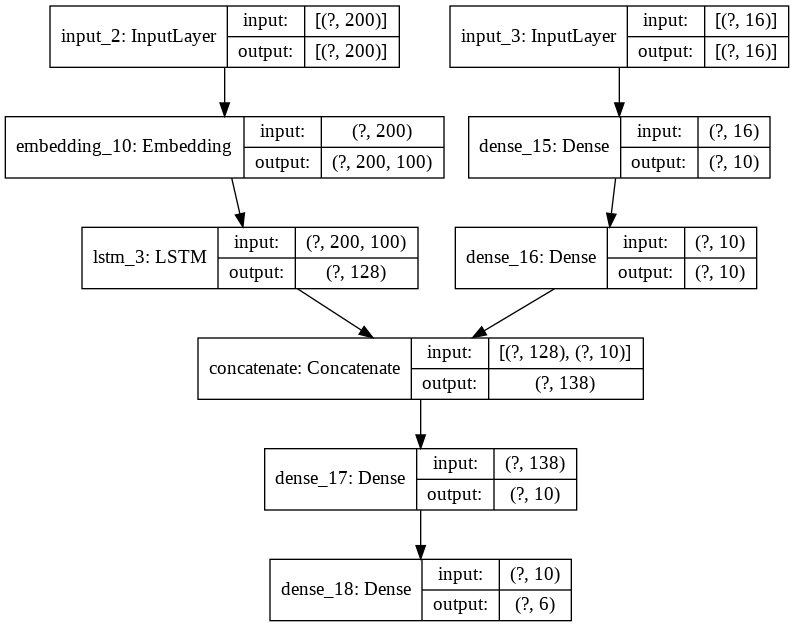

In [136]:
keras.utils.plot_model(model, show_shapes=True)

In [137]:
early_stopping_model= keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(x=[x_train, x_train_metadata], y=y_train, batch_size=32, epochs=30, verbose=1, validation_split=0.1, callbacks= [early_stopping_model] )
# since not x_val, then take 270 for x_train

Epoch 1/30
7/7 [==============================] - 2s 230ms/step - loss: 0.6908 - acc: 0.2176 - val_loss: 0.6768 - val_acc: 0.2083
Epoch 2/30
7/7 [==============================] - 1s 164ms/step - loss: 0.6666 - acc: 0.1019 - val_loss: 0.6386 - val_acc: 0.1250
Epoch 3/30
7/7 [==============================] - 1s 163ms/step - loss: 0.6567 - acc: 0.1111 - val_loss: 0.6276 - val_acc: 0.1250
Epoch 4/30
7/7 [==============================] - 1s 160ms/step - loss: 0.6537 - acc: 0.1111 - val_loss: 0.6285 - val_acc: 0.1250
Epoch 5/30
7/7 [==============================] - 1s 162ms/step - loss: 0.6552 - acc: 0.1111 - val_loss: 0.6343 - val_acc: 0.1250
Epoch 6/30
7/7 [==============================] - 1s 163ms/step - loss: 0.6479 - acc: 0.1065 - val_loss: 0.6140 - val_acc: 0.1250
Epoch 7/30
7/7 [==============================] - 1s 160ms/step - loss: 0.6405 - acc: 0.1111 - val_loss: 0.6221 - val_acc: 0.1250
Epoch 8/30
7/7 [==============================] - 1s 160ms/step - loss: 0.6412 - acc: 0.11

In [138]:
score = model.evaluate(x=[x_test, x_test_metadata], y=y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

1/1 [==============================] - 0s 1ms/step - loss: 0.5888 - acc: 0.0667
Test Score: 0.5888367295265198
Test Accuracy: 0.06666667014360428


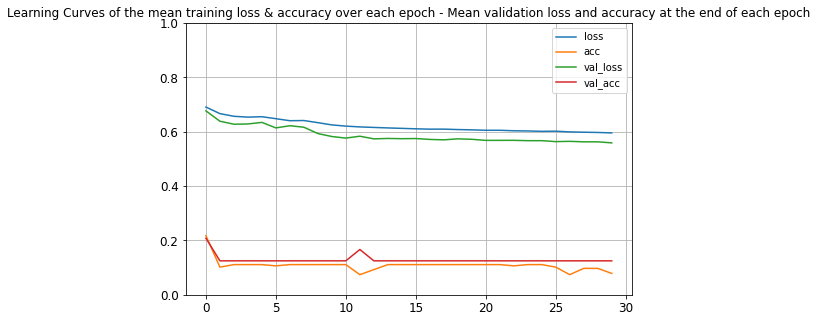

In [139]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting the vertical range to [0,1]
plt.title('Learning Curves of the mean training loss & accuracy over each epoch - Mean validation loss and accuracy at the end of each epoch')
plt.show()

# Training and validation curves are close between them, 
# fact which implies that not too much overfitting is taking place

In [140]:
scores=model.predict(x=[x_test, x_test_metadata])
len(scores)

30